In [2]:
using LinearAlgebra, RowEchelon, LaTeXStrings, Latexify, Plots, SymPy, LAcode
# First time use of LAcode: from LAcode.jl execute the pkg command  ] dev --local "."
#title( "The QR Decomposition", sz=30, color="darkred")
using PyCall
itikz=pyimport("itikz")
nM   =pyimport("itikz.nicematrix")
jinja=pyimport("jinja2");

<div style="float:center;width:100%;text-align:center;">
<strong style="height:100px;color:darkred;font-size:40px;">The QR Decomposition</strong><br>
</div>

# 1. Gram-Schmidt and the QR Decomposition

## 1.1 Gram-Schmidt and QR

##### **The Gram-Schmidt Equations**

<div style="float:left;width:85%;background-color:#F2F5A9;">

**The Gram-Schmidt Procedure**
$$
\begin{align}
w_1 & = \color{red}{v_1} && & \quad q_1 = \frac{1}{\lVert w_1 \rVert} w_1 \\
w_2 & = \color{red}{v_2} - Proj^\perp_{ span\{ w_1      \} } \; \color{red}{v_2} &=&\ \color{red}{v_2} - \frac{\color{red}{v_2} \cdot w_1}{w_1 \cdot w_1} w_1& \quad q_2 = \frac{1}{\lVert w_2 \rVert} w_2 \\ 
w_3 & = \color{red}{v_3} - Proj^\perp_{ span\{ w_1, w_2 \} } \; \color{red}{v_3} & =&\ \color{red}{v_3} - \frac{\color{red}{v_3} \cdot w_1}{w_1 \cdot w_1} w_1
                                                                 - \frac{\color{red}{v_3} \cdot w_2}{w_2 \cdot w_2} w_2 & \quad q_3 = \frac{1}{\lVert w_3 \rVert} w_3 \\   
 \dots& \dots\dots\dots\dots\dots\dots & &\dots\dots\dots\dots\dots\dots\dots & \\
w_k & = \color{red}{v_k} - Proj^\perp_{ span\{ w_1, w_2, \dots w_{k-1} \} } \; \color{red}{v_k} &&
& \quad q_k = \frac{1}{\lVert w_k \rVert} w_k 
\end{align}
$$
</div>

<div style="float:left;width:38%;;padding-right:3cm;">

**Remark:**
Scaling $w$ does not affect the projection terms:
$$
\begin{align}
& \tilde{w} & =&\;\; \color{red}{\alpha}\; w \\
& \frac{\tilde{w} \cdot v}{\tilde{w} \cdot \tilde{w}} \tilde{w} &=&\; \frac{\color{red}{\alpha}\; w \cdot v}{\color{red}{\alpha^2}\; w \cdot w} \;\color{red}\alpha\; w 
\end{align}
$$
</div>
<div style="float:left;width:40%;height:2.5cm;border:1px solid black;padding:10pt;">

We can **replace the $w_i$ in the Gram-Schmidt equations<br>$\quad$  by $q_i$ for example.**
</div>

##### **The QR Decomposition**

<div style="float:left;width:55%;padding-right:0.5cm;">

Let us rewrite these equations: solve for $v_i$ in terms of the $q_i$:

$$
\begin{align}
\color{red}{v_1} && = &\; \lVert w_1 \rVert\; \color{red}{q_1}  \\
\color{red}{v_2} & = w_2 + Proj^\perp_{ span\{ w_1      \} } \; {v_2} &=&\ \frac{{v_2} \cdot q_1}{q_1 \cdot q_1}\; \color{red}{q_1} + \lVert w_2 \rVert\; \color{red}{q_2} \\ 
\color{red}{v_3} & = w_3 + Proj^\perp_{ span\{ w_1, w_2 \} } \;  {v_3} & =&\ \frac{{v_3} \cdot q_1}{w_1 \cdot q_1}\; \color{red}{q_1}
                                                                 + \frac{{v_3} \cdot q_2}{q_2 \cdot q_2}\; \color{red}{q_2} + \lVert w_3 \rVert\; \color{red}{q_3}  \\   
 \dots& \dots\dots\dots\dots\dots\dots & &\dots\dots\dots\dots\dots\dots\dots & \\
\end{align}
$$
</div>
<div style="float:left;width:35%;height:4.6cm;padding-left:1cm;border-left:2px solid black;">

$\quad$ We see  $\color{red}{A = Q R}, \quad $ where

$$
\begin{align}
A &= \begin{pmatrix} v_1 & v_2 & \dots & v_{\color{red}{n}} \end{pmatrix}\\
Q &= \begin{pmatrix} q_1 & q_2 & \dots q_{\color{red}k} \end{pmatrix} \\
R &= \begin{pmatrix} \lVert w_1 \rVert & \frac{{v_2} \cdot q_1}{q_1 \cdot q_1} & \dots \\
                        0 & \lVert w_2 \rVert & \dots \\
                        \dots & \dots & \dots
\end{pmatrix}
\end{align}
$$
</div>

<div style="float:left;width:55%;height:3.8cm;background-color:#F2F5A9;">

**Theorem:** Let $A$ be a matrix in $\mathbb{R}^{M \times N}$.<br>
$\quad\quad$ T**hen $A$ has a factorization $A = Q R$** such that
* $Q^t Q = I$
* $R$ is an **upper triangular** matrix
* If the columns of $A$ are linearly independent, **$R$ is invertible**
</div>
<div style="float:right;width:35%;">

**Remark:**
* Gram-Schmidt constructs these matrices.
* The non-zero entries of $R$ are the coefficients computed for the projections

$$
A = Q R \Leftarrow \color{red}{R = Q^t A}
$$
</div>

## 1.2 QR and the Normal Equation

<div style="float:left;padding-right:1cm;">
We had arrived at the normal equation by multiplying $$A x = b - b_\perp$$
$\quad$ with $A^t$ to remove the $b_\perp$ term.

We only need any one solution $x$.<br>
$\quad\quad$ As we did before, assume that $A$ is full-column rank,<br>
$\quad\quad$ (i.e., remove any linearly dependent colums of the original matrix problem)
</div>
<img style="float:center;border:1px solid black;" width=200 src="Figs/OrthoProjection_into_plane.png">

----

IJulia.installkernel("Julia 6 threads", env=Dict("JULIA_NUM_THREADS" => " 6", ))
<div style="float:left;width:50%;height:4.2cm;padding:5pt;background-color:#F2F5A9;">

**Theorem:** Let $A$ in $\mathbb{R}^{M \times N}$ with reduced QR factorization $A = Q R$.<br>
    $\quad\quad$ Then $ A^t A x = A^t b \Leftrightarrow \color{red}{ R x = Q^t b }$

<br>

**Remark:** This theorem states that we can use the $Q R$ decomposition<br>
    $\quad\quad$ to solve the normal equation.
</div>
<div style="float:right;width:35%;">
Assume $A$ has full column rank, so $A = Q R$,<br>$\quad$ where $R$ (and hence $R^t$) is invertible:
$$A = Q R \Leftrightarrow A^t = R^t Q^t$$
<br>
$$\begin{align}
A x = b  &\Rightarrow A^t A x = A^t b \\
         & \Leftrightarrow R^t Q^t Q R x = R^t Q^t b \\
         & \Leftrightarrow Q^t Q R x = Q^t b \\
         & \Leftrightarrow R x = Q^t b
\end{align}$$
<div>

# 2. Computing the QR factorization

#### **There are a Number of Methods to Compute $A=Q R$**

The Gram Schmidt equations as written have **poor numerical properties.**<br>
Practical Implementations introduce some **highly successful** modifications
* **Immediately remove $\mathbf{q_i}$ components** from the remaining $v_i$ vectors
* **Reorder the remaining $\mathbf{v_i}$ vectors** at each step  (full pivoting)

There are other methods to compute the QR decomposition
* **Householder Reflections**
* **Givens Rotations**

#### **Naive Method (Computation by Hand):**

It will prove advantageous to systematicall keep track of all of the computations.<br>
$\quad\quad$ To do so, let us define a number of matrices and their layout:

<div style="float:left;width:50%;height:4.4cm;background-color: transparent;">
<style type="text/css">
.tftable {font-size:12px;color:#333333;width:12cm;border-width: 1px;border-color: #729ea5;border-collapse: collapse;}
.tftable th {font-size:12px;background-color:#acc8cc;border-width: 1px;padding: 8px;border-style: solid;border-color: #729ea5;text-align:left;}
.tftable tr {background-color:#ffffff;}
.tftable td {font-size:12px;border-width: 1px;padding: 8px;border-style: solid;border-color: #729ea5;}
</style>

**Matrix Definitions**
<table class="tftable" border="1">
<tr><th style="width:5cm;">Matrix</th><th>Comment</th></tr>
<tr><td>$A = ( v_1\ v_2\ \dots v_k )$</td><td>The initial vectors $v_i$</td></tr>
<tr><td>$W = ( w_1\ w_2\ \dots w_k )$</td><td>The orthogonal vectors $w_i$</td></tr>
<tr><td>$S = (W^t W)^{-\frac{1}{2}}$</td><td>The diagonal matrix with entries $\frac{1}{\lVert w_i \rVert}$</td></tr>
</table>
</div><div style="float:right;width:40%;padding:5px;">

**Layout of the Computations**
<div style="border:1px solid black;padding:10px;"><!-- ----------------------------------------------->
    $$\begin{align}
   &                                                     & \left( \begin{array}{r|r}\ \quad\quad A & \quad\; W \end{array}\right) & \\
   & \left(\begin{array}{r} \quad W^t \end{array}\right) & \left( \begin{array}{r|r}\;\;\; W^t A   & W^t W \end{array}\right) &\\
\left(\begin{array}{r} S \end{array}\right)
   & \left(\begin{array}{r}\ \color{red}{S\ W^t} \end{array}\right)   & \left( \begin{array}{r|r}\ \color{red}{S W^t A} & \;\quad\quad \end{array}\right) & \\
\end{align}$$
</div></div>

<div style="float:left;width:50%;padding:20px">

**The computation proceeds one $w_i$ vector at a time,**<br>
$\quad\quad$ filling in the matrix multiplications as we go.
    
We may **take advantage of scaling to avoid fractions**, i.e., replace<br>
$\quad\quad$ $w_i$ with $\tilde{w}_i = \alpha w_i$<br>
$\quad\quad$ in the layout, and for the computations.
</div><div style="float:right;width:40%;padding:20px">

$\color{blue}{\textbf{Error Check:}}$
* $W^t A$ and $S W^t A$ are **upper triangular**
* $W^t W$ is diagonal

**Result:**

* $\color{red}{Q^t = S W^t}$
* $\color{red}{R}\; = Q^t A = \color{red}{S W^t A}$
</div>

#### **Example**

##### **Step 1: Setup the Layout, Fill in $A= (v_1, v_2 \dots )$**

$A = \left(
\begin{array}{ccc}
1 & 1 & -1 \\
1 & -2 & 1 \\
-1 & -1 & 2 \\
1 & 1 & -1 \\
\end{array}
\right)$

##### **Step 2: Fill in $w_1, w^t_1, w^t_1 A, w^t_1 w_1$**

> $w_1 = \begin{pmatrix} 1 \\ 1 \\ -1 \\ 1 \end{pmatrix},\quad$ so $\quad w_1^t A = \begin{pmatrix} 4 & 1 & -3 \end{pmatrix},\quad w_1^t w_1 = ( 4 )$

##### **Step 3: Compute and Fill in $w_2, w^t_2, w^t_2 A, w^t_2 ( w_1 \ w_2 )$**


> $w_2 = v_2 - \frac{v_2 \cdot w_1}{w_1 \cdot w_1} w_1 = \frac{3}{4}\begin{pmatrix} 1 \\ -3 \\ -1 \\ 1 \end{pmatrix}, \quad$ we will use $\quad \tilde{w}_2 = \begin{pmatrix} 1 \\ -3 \\ -1 \\ 1 \end{pmatrix}\quad$ in lieu of $w_2.\:$<br>
$\quad\quad$ Fill $\tilde{w}_2$ into the layout, and carry out all the computations this makes possible<br>
$\quad\quad$ and verify the expected 0 values:
>
> $\tilde{w}^t_2 A = \begin{pmatrix} \color{red}0 & 9 & -7 \end{pmatrix}, \quad \tilde{w}_2 \cdot ( w_1 \;\; \tilde{w}_2 ) = ( \color{red}0 \;\; 12 )$

##### **Step 3: Compute and Fill in $w_3$ and All Resulting Computations**

> $w_3 = v_3 - \frac{v_3 \cdot w_1}{w_1 \cdot w_1} w_1  - \frac{v_3 \cdot w_2}{w_2 \cdot w_2} w_2 =
\frac{1}{3}\begin{pmatrix} 1 \\ 0 \\ 2 \\ 1 \end{pmatrix}, \quad$ we will use $\quad \tilde{w}_3 = \begin{pmatrix} 1 \\ 0 \\ 2 \\ 1 \end{pmatrix}\quad$ in lieu of $w_3.\:$<br>
$\quad\quad$ Fill $\tilde{w}_3$ into the layout, carry out all the computations this makes possible<br>
$\quad\quad$ and verify the expected 0 values:
>
> $\tilde{w}^t_3 A = \begin{pmatrix} \color{red}0 & \color{red}0 & 2 \end{pmatrix}, \quad \tilde{w}_3 \cdot ( w_1 \;\; \tilde{w}_2 \;\; w_3 ) = ( \color{red}0 \;\; \color{red}0 \;\; 6 )$

##### **Step 4: Fill in $S,$ Compute $Q^t$ and $R$**

$$S = \left(\begin{array}{rrr}
\frac{1}{2} & 0 & 0 \\
0 & \frac{1}{6} \, \sqrt{3} & 0 \\
0 & 0 & \frac{1}{6} \, \sqrt{6}
\end{array}\right), \quad
Q^t = \left(\begin{array}{rrrr}
\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} \\
\frac{1}{6} \, \sqrt{3} & -\frac{1}{2} \, \sqrt{3} & -\frac{1}{6} \, \sqrt{3} & \frac{1}{6} \, \sqrt{3} \\
\frac{1}{6} \, \sqrt{6} & 0 & \frac{1}{3} \, \sqrt{6} & \frac{1}{6} \, \sqrt{6}
\end{array}\right), \quad
R = \left(\begin{array}{rrr}
2 & \frac{1}{2} & -\frac{3}{2} \\
0 & \frac{3}{2} \, \sqrt{3} & -\frac{7}{6} \, \sqrt{3} \\
0 & 0 & \frac{1}{3} \, \sqrt{6}
\end{array}\right)
$$

#### **Naive Method (Julia Code Implementation using Rationals)**

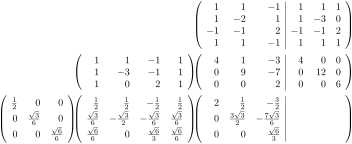

In [5]:
A = [1 1 -1 1; 1 -2 -1 1; -1 1 2 -1]'
W = [1 1 -1 1; 1 -3 -1 1; 1 0 2 1]'
qr_mat_rep, qr_mat_fmt, qr_submatrix_locs  = nM.qr_layout(A,W)

cmds = itikz.build_commands_dict(use_xetex=true,use_dvi=false,crop=true)
h = itikz.fetch_or_compile_svg( jinja.Template( nM.GE_TEMPLATE ).render(
        preamble=nM.preamble*raw"\NiceMatrixOptions{cell-space-top-limit = 1pt,cell-space-bottom-limit = 1pt}",
        extension=nM.extension,
        mat_rep=qr_mat_rep,
        mat_format=qr_mat_fmt,
        submatrix_locs=qr_submatrix_locs,# pivot_locs=pivot_locs, txt_with_locs=txt_with_locs
        ),
        prefix="test_",
        working_dir="/tmp/itikz",
        debug=false,
        keep_file="/tmp/itikz/foo__",
        tex_program=cmds["tex_program"], svg_converter=cmds["svg_converter"],svg_crop=cmds["svg_crop"], nexec=4 );
h

In [ ]:
using LAcode
LAcode.title("Linearly Dependent Column",sz=15)
A = [1 1 -1 1; 1 -1 -1 1; -1 1 1 -1]'
LAcode.title("A =",sz=10)
display(latexify(A))

LAcode.title("W =", sz=10)
latexify(LAcode.w_gram_schmidt(A))

In [5]:
A = [1 1 -1 1; 1 -2 -1 1; -1 1 2 -1]'
LAcode.w_gram_schmidt(A)

4×3 Array{Rational{Int64},2}:
  1//1   3//4  1//3
  1//1  -9//4  0//1
 -1//1  -3//4  2//3
  1//1   3//4  1//3

In [6]:
println(latexify(A))

\begin{equation}
\left[
\begin{array}{ccc}
1 & 1 & -1 \\
1 & -2 & 1 \\
-1 & -1 & 2 \\
1 & 1 & -1 \\
\end{array}
\right]
\end{equation}

